In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

In [62]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
print(X.shape)

(1000, 2)


In [63]:
pd.DataFrame(X)

,0,1
0,-0.807236,2.669463
1,1.926358,4.152430
2,-1.500166,3.101333
3,-1.109050,2.877864
4,-2.531227,1.919691
...,...,...
995,1.953570,0.916943
996,-0.681908,2.242288
997,0.412302,0.491592
998,-2.532941,2.096332


In [64]:
pd.DataFrame(y)

,0
0,2
1,0
2,2
3,2
4,2
...,...
995,1
996,2
997,1
998,2


In [ ]:
X[:,0]

In [65]:
colors = {0:'red', 1:'blue', 2:'green'}

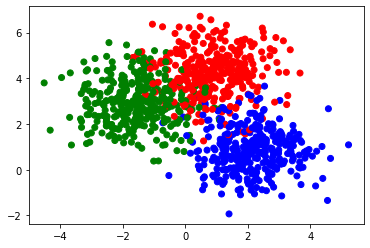

In [66]:
plt.scatter(X[:,0], X[:,1], c=pd.Series(y).apply(lambda x: colors[x]))
plt.show()

In [67]:
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 1000)
x2 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 1000)
xx1, xx2 = np.meshgrid(x1, x2)

In [68]:
xx1.shape

(1000, 1000)

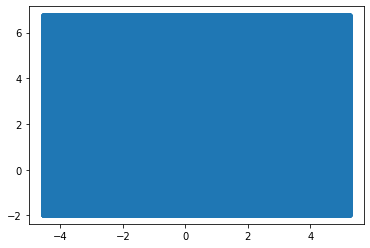

In [69]:
plt.scatter(xx1, xx2)
plt.show()

In [70]:
logreg = LogisticRegression(random_state=0).fit(X, y)

In [71]:
xx1 = xx1.reshape(1000*1000)

In [72]:
xx2 = xx2.reshape(1000*1000)

In [73]:
X_grid = pd.DataFrame({'col1': xx1, 'col2': xx2})

In [74]:
X_grid

,col1,col2
0,-4.521517,-1.936891
1,-4.511759,-1.936891
2,-4.502002,-1.936891
3,-4.492244,-1.936891
4,-4.482487,-1.936891
...,...,...
999995,5.187212,6.716241
999996,5.196970,6.716241
999997,5.206727,6.716241
999998,5.216485,6.716241


In [75]:
logreg.predict(X_grid)

array([2, 2, 2, ..., 0, 0, 0])

In [76]:
X_grid['y_pred'] = logreg.predict(X_grid)

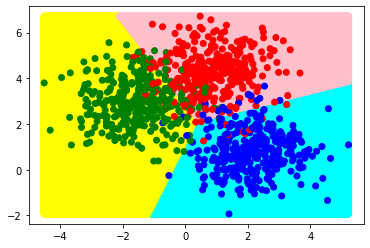

In [77]:
colors_true = {0:'red', 1:'blue', 2:'green'}
colors_grid = {0:'pink', 1:'cyan', 2:'yellow'}

plt.scatter(X_grid['col1'], X_grid['col2'], c=X_grid['y_pred'].apply(lambda x: colors_grid[x]))
plt.scatter(X[:,0], X[:,1], c=pd.Series(y).apply(lambda x: colors_true[x]))
plt.show()